Valor otimizado: [-3.24639427]
Posição otimizada: [-1.11051142]


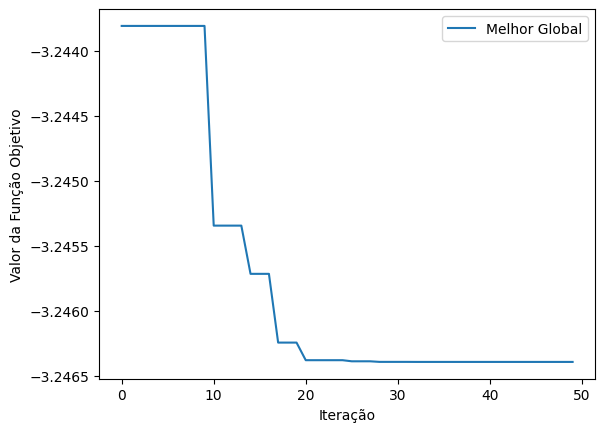

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define a função objetivo a ser otimizada (exemplo fictício)
def funcao_objetivo(x):
    return x ** 2 + 5 * np.sin(x)

# Parâmetros do PSO
num_particulas = 20
num_dimensoes = 1
max_iteracoes = 50
c1 = 1.5  # Coeficiente cognitivo
c2 = 1.5  # Coeficiente social
w = 0.7   # Peso de inércia

# Inicialize partículas com posições e velocidades aleatórias
particulas = np.random.uniform(-10, 10, (num_particulas, num_dimensoes))
velocidades = np.zeros((num_particulas, num_dimensoes))
melhores_posicoes_individuais = particulas.copy()
melhores_valores_individuais = funcao_objetivo(melhores_posicoes_individuais)

# Inicialize a melhor posição global e seu valor
indice_melhor_global = np.argmin(melhores_valores_individuais)
melhor_posicao_global = melhores_posicoes_individuais[indice_melhor_global]
melhor_valor_global = melhores_valores_individuais[indice_melhor_global]

# Para armazenar os valores para o gráfico
historico_valores = []

# Loop de otimização
for iteracao in range(max_iteracoes):
    for i in range(num_particulas):
        # Atualize a velocidade e posição da partícula
        velocidades[i] = (w * velocidades[i] +
                          c1 * np.random.rand() * (melhores_posicoes_individuais[i] - particulas[i]) +
                          c2 * np.random.rand() * (melhor_posicao_global - particulas[i]))
        particulas[i] += velocidades[i]

        # Avalie a aptidão da partícula
        valor_particula = funcao_objetivo(particulas[i])

        # Atualize o melhor valor pessoal se necessário
        if valor_particula < melhores_valores_individuais[i]:
            melhores_valores_individuais[i] = valor_particula
            melhores_posicoes_individuais[i] = particulas[i]

        # Atualize o melhor valor global se necessário
        if valor_particula < melhor_valor_global:
            melhor_valor_global = valor_particula
            melhor_posicao_global = particulas[i]

    # Armazene o valor atual para o gráfico
    historico_valores.append(melhor_valor_global)

# Imprima o resultado otimizado
print("Valor otimizado:", melhor_valor_global)
print("Posição otimizada:", melhor_posicao_global)

# Plote o processo de otimização
plt.plot(range(max_iteracoes), historico_valores, label='Melhor Global')
plt.xlabel('Iteração')
plt.ylabel('Valor da Função Objetivo')
plt.legend()
plt.show()

